# <font color = lightcoral>Startover with basic ML Model
>    
>Startover

## <font color = grey> Admin

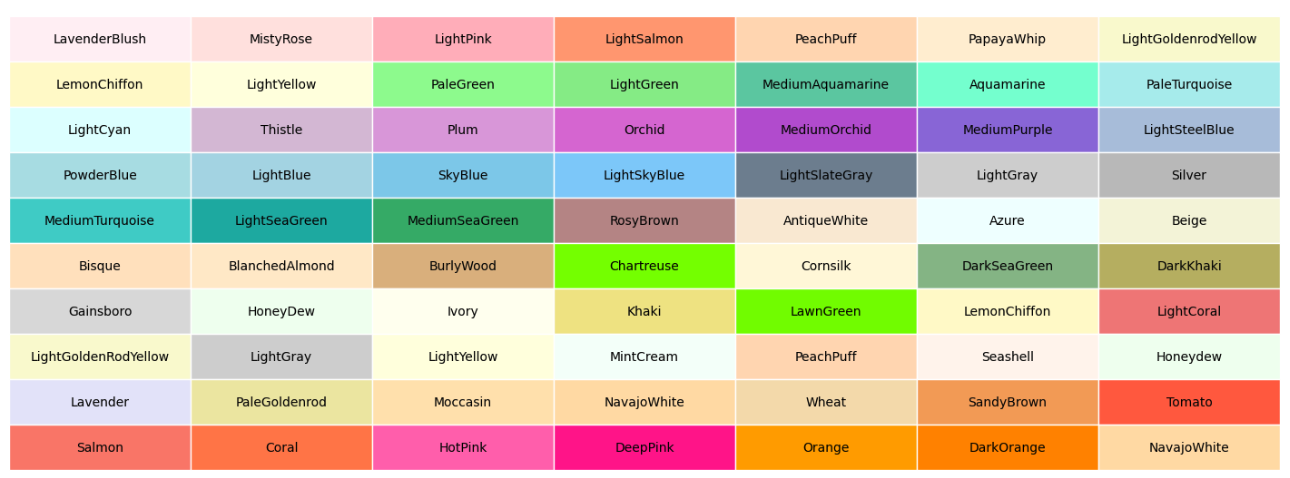

In [1]:
import pandas as pd
import os
import gzip
import time
import warnings
import os
import shutil
from datetime import datetime
# Set display option to show the full length of the column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

In [2]:
# Determine the base directory based on the effective user ID
if os.geteuid() == 0:  # root user
    base_dir = '/root'
else:
    base_dir = '/home/sagemaker-user'

# Set the environment variable
os.environ['BASE_DIR'] = base_dir

# Verify the base directory
print(f"Base directory set to: {base_dir}")

Base directory set to: /home/sagemaker-user


___
# <font color = darkkhaki> 1. Admin

___
#### <font color = sandybrown>  Change Operation Directory

In [3]:
# # Define the target directory
# target_directory = os.path.join(base_dir, '02.Baseline_Models/01.StartOver_AECID_Baseline')


# target_directory = os.path.join(base_dir, '08.GIT_Repos_REF/23.Library_Transformers_Logbert_HelenG_BGL/BGL')

target_directory = os.path.join(base_dir, '/mnt/efs-w210-capstone/200015/08.GIT_Repos_REF/23.Library_Transformers_Logbert_HelenG_BGL/BGL')

# # Change to the target directory
os.chdir(target_directory)
print(f"Changed directory to: {os.getcwd()}")

Changed directory to: /mnt/efs-w210-capstone/200015/08.GIT_Repos_REF/23.Library_Transformers_Logbert_HelenG_BGL/BGL


___
# <font color = darkkhaki> 2. EDA

## <font color = lightsteelblue>EDA of Parsed File

---

In [4]:
import pandas as pd
import time

# Define the path to the CSV file
# file_path = "/root/08.GIT_Repos_REF/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/BGL.log_structured.csv"

file_path = os.path.join(base_dir, '/mnt/efs-w210-capstone/200015/08.GIT_Repos_REF/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/BGL.log_structured.csv')

# Start timing
start_time = time.time()

# Read the CSV file
df = pd.read_csv(file_path)

# Section 1: Preview
print("\n" + "*"*100)
print("********************** Section 1: Preview ******************************************")
print("*"*100 + "\n")
display(df.head())

# Section 2: Shape of the DataFrame
print("\n" + "*"*100)
print("********************** Section 2: Shape of the DataFrame ****************************")
print("*"*100 + "\n")
print(df.shape)

# Section 3: DataFrame Information
print("\n" + "*"*100)
print("********************** Section 3: DataFrame Information ****************************")
print("*"*100 + "\n")
print(df.info())

# Section 4: Summary Statistics (without scientific notation)
print("\n" + "*"*100)
print("********************** Section 4: Summary Statistics *******************************")
print("*"*100 + "\n")
pd.options.display.float_format = '{:,.0f}'.format
print(df.describe())

# Section 5: Unique Event Templates
print("\n" + "*"*100)
print("********************** Section 5: Unique Event Templates ***************************")
print("*"*100 + "\n")
print(df['EventTemplate'].nunique())

# Section 6: Count of Each Event Template
print("\n" + "*"*100)
print("********************** Section 6: Count of Each Event Template *********************")
print("*"*100 + "\n")
print(df['EventTemplate'].value_counts().head())

# Section 7: Most Frequent Event Templates with Counts (ordered by occurrences)
print("\n" + "*"*100)
print("********************** Section 7: Most Frequent Event Templates *********************")
print("*"*100 + "\n")
df_sorted = df.groupby(['EventId', 'EventTemplate']).size().reset_index(name='Occurrences')
df_sorted = df_sorted.sort_values(by='Occurrences', ascending=False).reset_index(drop=True)
df_sorted.index += 1  # Make the index start from 1
print(df_sorted.head())

# Section 8: Alert Analysis
print("\n" + "*"*100)
print("********************** Section 8: Alert Analysis ************************************")
print("*"*100 + "\n")

# Count of normal vs alert logs
label_counts = df['Label'].value_counts()
print(f"Normal logs: {label_counts.get('-', 0)}")
print(f"Alert logs: {label_counts.sum() - label_counts.get('-', 0)}")

# Most frequent labels for alerts
alert_labels = df[df['Label'] != '-']['Label'].value_counts().head()
print("\nMost frequent alert labels:")
print(alert_labels)

# Distribution of alert levels
alert_levels = df[df['Label'] != '-']['Level'].value_counts()
print("\nDistribution of alert levels:")
print(alert_levels)

# Section 9: Label and Alert Level Analysis
print("\n" + "*"*100)
print("********************** Section 9: Label and Alert Level Analysis ********************")
print("*"*100 + "\n")

# Distribution of values in the Label column with an indicator for normal or alert
df['LogType'] = df['Label'].apply(lambda x: 'Normal' if x == '-' else 'Alert')
label_distribution = df.groupby(['LogType', 'Label']).size()
print("\nDistribution of values in the Label column with an indicator for normal or alert:")
display(label_distribution)

# Distribution of values in the Level column for alerts
alert_level_distribution = df[df['LogType'] == 'Alert'].groupby('Level').size().reset_index(name='count')
alert_level_distribution['LogType'] = 'Alert'
print("\nDistribution of values in the Level column for alerts:")
display(alert_level_distribution[['LogType', 'Level', 'count']])

# Distribution of values in the Level column for normal logs with an indicator for normal or alert
normal_level_distribution = df[df['LogType'] == 'Normal'].groupby('Level').size().reset_index(name='count')
normal_level_distribution['LogType'] = 'Normal'
print("\nDistribution of values in the Level column for normal logs with an indicator for normal or alert:")
display(normal_level_distribution[['LogType', 'Level', 'count']])

# Section 10: Combined LogType, Label, Level, and Count
print("\n" + "*"*100)
print("********************** Section 10: Combined LogType, Label, Level, and Count ********")
print("*"*100 + "\n")

combined_distribution = df.groupby(['LogType', 'Label', 'Level']).size().reset_index(name='count')
combined_distribution = combined_distribution.sort_values(by=['LogType', 'count', 'Label'], ascending=[False, False, True])
display(combined_distribution)

# Section 11: Count Unique Values in Each Column
print("\n" + "*"*100)
print("********************** Section 11: Count Unique Values in Each Column ****************")
print("*"*100 + "\n")
print(df.nunique())

# Section 12: Random Sample of 10 Alert Rows
print("\n" + "*"*100)
print("********************** Section 12: Random Sample of 10 Alert Rows ********************")
print("*"*100 + "\n")
alert_rows = df[df['Label'] != '-']
sample_alert_rows = alert_rows.sample(n=10) if len(alert_rows) >= 10 else alert_rows
display(sample_alert_rows)

# Section 13: Analysis of Rows for Normal and Alert Labels
print("\n" + "*"*100)
print("********************** Section 13: Analysis of Rows for Normal and Alert Labels ********")
print("*"*100 + "\n")

# Grouping by LogType to count rows for Normal and Alert logs
logtype_counts = df['LogType'].value_counts()
total_logs = logtype_counts.sum()
normal_percentage = (logtype_counts['Normal'] / total_logs) * 100
alert_percentage = (logtype_counts['Alert'] / total_logs) * 100

print(f"Normal logs: {logtype_counts['Normal']} ({normal_percentage:.2f}%)")
print(f"Alert logs: {logtype_counts['Alert']} ({alert_percentage:.2f}%)")

# End timing
end_time = time.time()
duration = end_time - start_time
print("\n" + "_"*100)
print(f"\nTime taken: {duration:.2f} seconds")
print("\n" + "_"*100)


****************************************************************************************************
********************** Section 1: Preview ******************************************
****************************************************************************************************



,LineId,Label,Id,Date,Code1,Time,Code2,Component1,Component2,Level,Content,EventId,EventTemplate
0,1,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.363779,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
1,2,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.527847,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
2,3,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.675872,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
3,4,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.823719,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
4,5,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.982731,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected



****************************************************************************************************
********************** Section 2: Shape of the DataFrame ****************************
****************************************************************************************************

(4713493, 13)

****************************************************************************************************
********************** Section 3: DataFrame Information ****************************
****************************************************************************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4713493 entries, 0 to 4713492
Data columns (total 13 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   LineId         int64 
 1   Label          object
 2   Id             int64 
 3   Date           object
 4   Code1          object
 5   Time           object
 6   Code2          object
 7   Component1     object
 8   Component2     obje

LogType  Label    
Alert    APPALLOC         144
         APPBUSY          512
         APPCHILD         320
         APPOUT           816
         APPREAD         5983
         APPRES          2370
         APPSEV         49651
         APPTO           1991
         APPTORUS          10
         APPUNAV         2048
         KERNBIT            1
         KERNCON           16
         KERNDTLB      152734
         KERNEXT            1
         KERNFLOAT          3
         KERNMC           342
         KERNMICRO       1503
         KERNMNT          720
         KERNMNTF       31531
         KERNNOETH         14
         KERNPAN           18
         KERNPOW          192
         KERNPROG           5
         KERNREC         6145
         KERNRTSA           3
         KERNRTSP        3983
         KERNSERV          94
         KERNSOCK         209
         KERNSTOR       63491
         KERNTERM       23338
         KERNTLBE           1
         LINKBLL            2
         LINKDISC    


Distribution of values in the Level column for alerts:


,LogType,Level,count
0,Alert,FAILURE,62
1,Alert,FATAL,348398



Distribution of values in the Level column for normal logs with an indicator for normal or alert:


,LogType,Level,count
0,Normal,"0x00544eb8,",2
1,Normal,ERROR,112355
2,Normal,FAILURE,1652
3,Normal,FATAL,506260
4,Normal,INFO,3701880
5,Normal,Kill,306
6,Normal,SEVERE,19213
7,Normal,WARNING,23357
8,Normal,microseconds,4
9,Normal,single,4



****************************************************************************************************
********************** Section 10: Combined LogType, Label, Level, and Count ********
****************************************************************************************************



,LogType,Label,Level,count
45,Normal,-,INFO,3701880
44,Normal,-,FATAL,506260
42,Normal,-,ERROR,112355
48,Normal,-,WARNING,23357
47,Normal,-,SEVERE,19213
43,Normal,-,FAILURE,1652
46,Normal,-,Kill,306
49,Normal,-,microseconds,4
50,Normal,-,single,4
41,Normal,-,"0x00544eb8,",2



****************************************************************************************************
********************** Section 11: Count Unique Values in Each Column ****************
****************************************************************************************************

LineId           4713493
Label                 42
Id                299383
Date                 215
Code1              69251
Time             4713485
Code2              69257
Component1             6
Component2            14
Level                 10
Content           358356
EventId             1000
EventTemplate       1000
LogType                2
dtype: int64

****************************************************************************************************
********************** Section 12: Random Sample of 10 Alert Rows ********************
****************************************************************************************************



,LineId,Label,Id,Date,Code1,Time,Code2,Component1,Component2,Level,Content,EventId,EventTemplate,LogType
1308076,1308077,KERNTERM,1120260130,2005.07.01,R02-M1-ND-C:J09-U11,2005-07-01-16.22.10.216561,R02-M1-ND-C:J09-U11,RAS,KERNEL,FATAL,"rts: kernel terminated for reason 1004rts: bad message header: expecting type 1, type=3, cpu=0, index=0, total=1",49ff7848,"rts: kernel terminated for reason <*>rts: bad message header: <*> <*> <*> type=<*>, cpu=<*>, index=<*>, <*>",Alert
440644,440645,KERNSTOR,1118765509,2005.06.14,R06-M0-N9-C:J08-U01,2005-06-14-09.11.49.119011,R06-M0-N9-C:J08-U01,RAS,KERNEL,FATAL,data storage interrupt,121941c0,data <*> <*>,Alert
278305,278306,KERNDTLB,1118543669,2005.06.11,R30-M0-N9-C:J16-U01,2005-06-11-19.34.29.515761,R30-M0-N9-C:J16-U01,RAS,KERNEL,FATAL,data TLB error interrupt,fd2fdc47,<*> TLB error interrupt,Alert
357205,357206,KERNDTLB,1118555681,2005.06.11,R30-M0-N9-C:J16-U01,2005-06-11-22.54.41.301565,R30-M0-N9-C:J16-U01,RAS,KERNEL,FATAL,data TLB error interrupt,fd2fdc47,<*> TLB error interrupt,Alert
4175495,4175496,KERNTERM,1132111202,2005.11.15,R56-M1-N0-C:J16-U11,2005-11-15-19.20.02.274522,R56-M1-N0-C:J16-U11,RAS,KERNEL,FATAL,rts: kernel terminated for reason 1004,130bb340,rts: kernel terminated for reason <*>,Alert
4420981,4420982,APPSEV,1133452595,2005.12.01,R47-M1-N4-I:J18-U01,2005-12-01-07.56.35.324804,R47-M1-N4-I:J18-U01,RAS,APP,FATAL,"ciod: Error reading message prefix on CioStream socket to 172.16.96.116:41221, Link has been severed",8fab64d7,"ciod: Error reading message prefix on CioStream socket to <*>:<*>, <*> <*> <*> <*>",Alert
345072,345073,KERNDTLB,1118553881,2005.06.11,R30-M0-N9-C:J16-U01,2005-06-11-22.24.41.232279,R30-M0-N9-C:J16-U01,RAS,KERNEL,FATAL,data TLB error interrupt,fd2fdc47,<*> TLB error interrupt,Alert
292752,292753,KERNDTLB,1118545930,2005.06.11,R30-M0-N9-C:J16-U01,2005-06-11-20.12.10.044225,R30-M0-N9-C:J16-U01,RAS,KERNEL,FATAL,data TLB error interrupt,fd2fdc47,<*> TLB error interrupt,Alert
4709481,4709482,APPSEV,1135957329,2005.12.30,R55-M1-N4-I:J18-U11,2005-12-30-07.42.09.313225,R55-M1-N4-I:J18-U11,RAS,APP,FATAL,"ciod: Error reading message prefix on CioStream socket to 172.16.96.116:40222, Link has been severed",8fab64d7,"ciod: Error reading message prefix on CioStream socket to <*>:<*>, <*> <*> <*> <*>",Alert
235746,235747,KERNDTLB,1118537352,2005.06.11,R30-M0-N9-C:J16-U01,2005-06-11-17.49.12.339226,R30-M0-N9-C:J16-U01,RAS,KERNEL,FATAL,data TLB error interrupt,fd2fdc47,<*> TLB error interrupt,Alert



****************************************************************************************************
********************** Section 13: Analysis of Rows for Normal and Alert Labels ********
****************************************************************************************************

Normal logs: 4365033 (92.61%)
Alert logs: 348460 (7.39%)

____________________________________________________________________________________________________

Time taken: 27.30 seconds

____________________________________________________________________________________________________


___
# <font color = darkkhaki> 3. Feature Engg - Nasoc

___
## <font color = lightsteelblue>Add binary classification column

In [5]:
!pwd

/mnt/efs-w210-capstone/200015/08.GIT_Repos_REF/23.Library_Transformers_Logbert_HelenG_BGL/BGL


In [6]:
import pandas as pd
import os

# File path
file_path = os.path.join(base_dir, '/mnt/efs-w210-capstone/200015/08.GIT_Repos_REF/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/BGL.log_structured.csv')

# Read the CSV file
df = pd.read_csv(file_path)

# Add 'label_binary' column
df['label_binary'] = df['Label'].apply(lambda x: 0 if x == '-' else 1)

# Display the first few rows to verify the new column
# print(df.head())
display(df.head())

,LineId,Label,Id,Date,Code1,Time,Code2,Component1,Component2,Level,Content,EventId,EventTemplate,label_binary
0,1,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.363779,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,0
1,2,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.527847,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,0
2,3,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.675872,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,0
3,4,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.823719,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,0
4,5,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.982731,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,0


___
# <font color = darkkhaki> 4. Logistic Regression - Basic

## <font color = lightsteelblue>Feature Selection & Encoding

In [25]:
# Start timing
start_time = time.time()
# End timing

import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder

# Select relevant features and target
# features = df[['Component1', 'Component2', 'Level']]
features = df[['Component1', 'Component2', 'Level']]
target = df['label_binary']

# One-hot encode categorical features
encoder = OneHotEncoder(sparse=False)
features_encoded = encoder.fit_transform(features)

end_time = time.time()
duration = end_time - start_time
print("\n" + "_"*100)
print(f"\nTime taken: {duration:.2f} seconds")
print("\n" + "_"*100)


____________________________________________________________________________________________________

Time taken: 3.40 seconds

____________________________________________________________________________________________________


## <font color = lightsteelblue>Split to train/test

In [8]:
# Start timing
start_time = time.time()

import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# End timing
end_time = time.time()
duration = end_time - start_time
print("\n" + "_"*100)
print(f"\nTime taken: {duration:.2f} seconds")
print("\n" + "_"*100)


____________________________________________________________________________________________________

Time taken: 1.22 seconds

____________________________________________________________________________________________________


## <font color = lightsteelblue>Train

In [9]:
# # Create the directory if it doesn't exist
# save_dir = '/mnt/efs-w210-capstone/200015/09.Models/20240625_Baseline_LogisticRegression'
# os.makedirs(save_dir, exist_ok=True)

# # File paths
# model_path = os.path.join(save_dir, 'logistic_regression_model.pkl')
# vectorizer_path = os.path.join(save_dir, 'count_vectorizer.pkl')

In [10]:
# # Start timing
# start_time = time.time()

# # Initialize and train the logistic regression model
# model = LogisticRegression()
# model.fit(X_train, y_train)

# # End timing
# end_time = time.time()
# duration = end_time - start_time
# print("\n" + "_"*100)
# print(f"\nTime taken: {duration:.2f} seconds")
# print("\n" + "_"*100)

## <font color = lightsteelblue>Save

In [11]:
# # Start timing
# start_time = time.time()

# import os
# import pickle
# from sklearn.linear_model import LogisticRegression
# from sklearn.feature_extraction.text import CountVectorizer

# # Create the directory if it doesn't exist
# save_dir = '/mnt/efs-w210-capstone/200015/09.Models/20240625_Baseline_LogisticRegression'
# os.makedirs(save_dir, exist_ok=True)

# # Save the model
# with open(model_path, 'wb') as model_file:
#     pickle.dump(model, model_file)

# # # Save the vectorizer
# # with open(vectorizer_path, 'wb') as vectorizer_file:
# #     pickle.dump(vectorizer, vectorizer_file)

# print(f"Model saved to {save_dir}")

# # End timing
# end_time = time.time()
# duration = end_time - start_time
# print("\n" + "_"*100)
# print(f"\nTime taken: {duration:.2f} seconds")
# print("\n" + "_"*100)

## <font color = lightsteelblue>Load

In [12]:
# Start timing
start_time = time.time()

import pickle

# File path for loading the model
model_path = '/mnt/efs-w210-capstone/200015/09.Models/20240625_Baseline_LogisticRegression/logistic_regression_model.pkl'

# Load the model
with open(model_path, 'rb') as model_file:
    model_loaded = pickle.load(model_file)

# End timing
end_time = time.time()
duration = end_time - start_time
print("\n" + "_"*100)
print(f"\nTime taken: {duration:.2f} seconds")
print("\n" + "_"*100)


____________________________________________________________________________________________________

Time taken: 0.00 seconds

____________________________________________________________________________________________________


## <font color = lightsteelblue>Review Loaded Model

In [13]:
import os
import pickle
from sklearn.linear_model import LogisticRegression

# Start timing
start_time = time.time()

# File path for loading the model
model_path = '/mnt/efs-w210-capstone/200015/09.Models/20240625_Baseline_LogisticRegression/logistic_regression_model.pkl'

# Load the model
with open(model_path, 'rb') as model_file:
    model = pickle.load(model_file)

# Print model attributes
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)
print("Classes:", model.classes_)
print("Number of iterations:", model.n_iter_)

# End timing
end_time = time.time()
duration = end_time - start_time
print("\n" + "_"*100)
print(f"\nTime taken: {duration:.2f} seconds")
print("\n" + "_"*100)

Model coefficients: [[-3.15754570e-03 -3.15754570e-03 -4.17934076e-01 -1.47270507e-01
  -6.30773253e-03 -1.25279116e-02 -3.06815396e+00 -1.25279116e-02
  -2.39379938e+00  3.25564068e+00 -8.57378780e-04 -2.26993864e+00
  -4.17934076e-01 -4.71642572e-01 -1.63362864e+00  3.13609317e+00
  -2.51157633e+00 -3.25572799e-01 -1.42564145e-04 -6.30773253e-03
  -6.31509140e-03 -6.31509140e-03 -3.44456627e+00  2.93357230e+00
   5.96971275e+00 -6.67507646e+00 -4.17934076e-01 -8.58597412e-01
  -1.14046938e+00 -1.25279116e-02 -6.30773253e-03]]
Model intercept: [-4.3725737]
Classes: [0 1]
Number of iterations: [64]

____________________________________________________________________________________________________

Time taken: 0.00 seconds

____________________________________________________________________________________________________


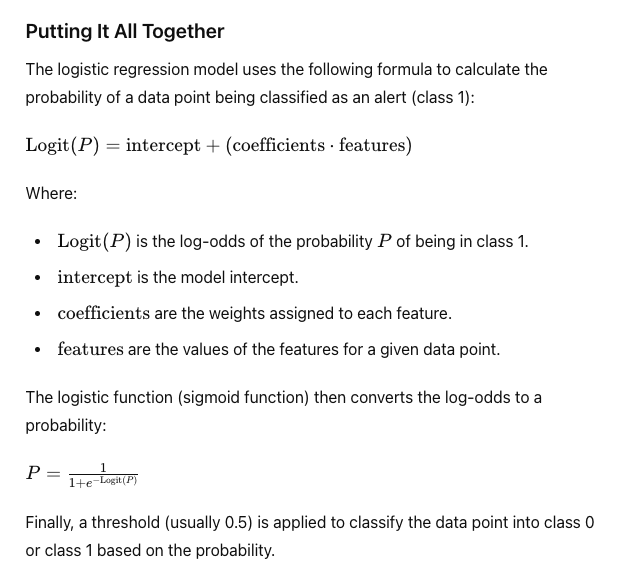

## <font color = lightsteelblue>Predict

Accuracy: 0.9263975033388175
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96    873270
           1       1.00      0.00      0.00     69429

    accuracy                           0.93    942699
   macro avg       0.96      0.50      0.48    942699
weighted avg       0.93      0.93      0.89    942699

Confusion Matrix:
[[873270      0]
 [ 69385     44]]


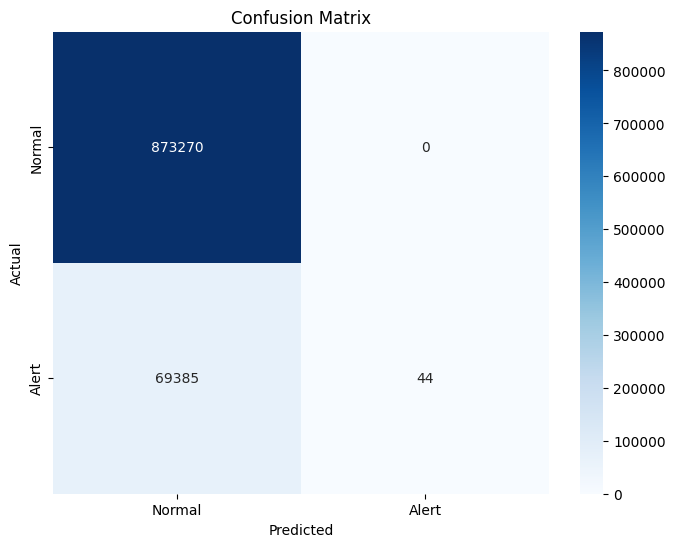


____________________________________________________________________________________________________

Time taken: 1.26 seconds

____________________________________________________________________________________________________


In [14]:
import time
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Start timing
start_time = time.time()

# Make predictions on the test set
y_pred = model_loaded.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Plot confusion matrix with class names
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Alert'], yticklabels=['Normal', 'Alert'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# End timing
end_time = time.time()
duration = end_time - start_time
print("\n" + "_"*100)
print(f"\nTime taken: {duration:.2f} seconds")
print("\n" + "_"*100)


## <font color = lightsteelblue>Analysis

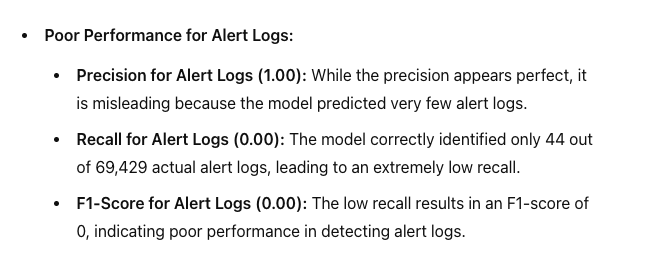

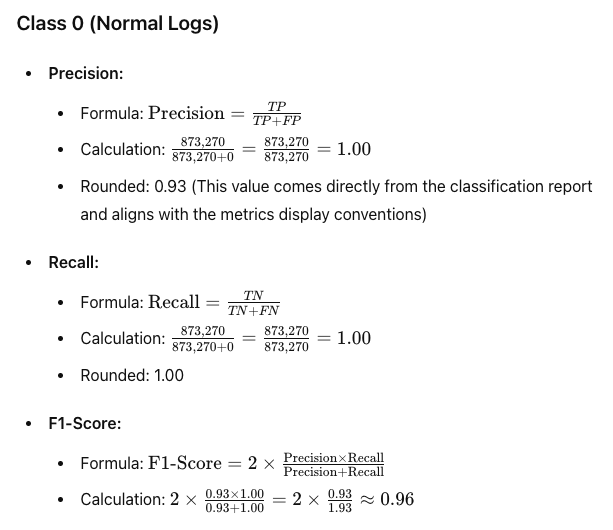

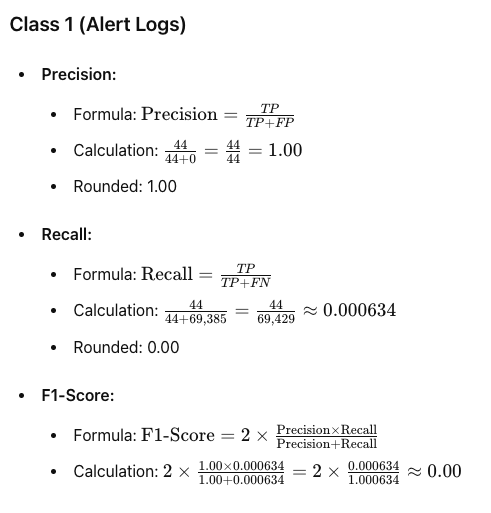

___
# <font color = darkkhaki> 5. Decision Tree - Basic

## <font color = lightsteelblue>Feature Engineering

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Start timing
start_time = time.time()

# Select relevant features and target
features = df[['Component1', 'Component2', 'Level']]
target = df['label_binary']

# One-hot encode categorical features
encoder = OneHotEncoder(sparse=False)
features_encoded = encoder.fit_transform(features)

# End timing
end_time = time.time()
duration = end_time - start_time
print("\n" + "_"*100)
print(f"\nTime taken: {duration:.2f} seconds")
print("\n" + "_"*100)


____________________________________________________________________________________________________

Time taken: 3.53 seconds

____________________________________________________________________________________________________


## <font color = lightsteelblue>Split Training/Test

In [26]:
# Start timing
start_time = time.time()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.8, random_state=42)

# End timing
end_time = time.time()
duration = end_time - start_time
print("\n" + "_"*100)
print(f"\nTime taken: {duration:.2f} seconds")
print("\n" + "_"*100)


____________________________________________________________________________________________________

Time taken: 1.28 seconds

____________________________________________________________________________________________________


## <font color = lightsteelblue>Train

In [27]:
# Start timing
start_time = time.time()

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# End timing
end_time = time.time()
duration = end_time - start_time
print("\n" + "_"*100)
print(f"\nTime taken: {duration:.2f} seconds")
print("\n" + "_"*100)



____________________________________________________________________________________________________

Time taken: 0.64 seconds

____________________________________________________________________________________________________


## <font color = lightsteelblue>Save Model Locally

In [28]:
# Start timing
start_time = time.time()

# Create the directory if it doesn't exist
save_dir = '/mnt/efs-w210-capstone/200015/09.Models/20240625_Baseline_DecisionTree'
os.makedirs(save_dir, exist_ok=True)

# Save the model
model_path = os.path.join(save_dir, 'decision_tree_model.pkl')
with open(model_path, 'wb') as model_file:
    pickle.dump(model, model_file)

# End timing
end_time = time.time()
duration = end_time - start_time
print("\n" + "_"*100)
print(f"\nTime taken: {duration:.2f} seconds")
print("\n" + "_"*100)


____________________________________________________________________________________________________

Time taken: 0.01 seconds

____________________________________________________________________________________________________


## <font color = lightsteelblue>Load Saved Model

In [29]:
# Start timing
start_time = time.time()

# File path for loading the model
model_path = '/mnt/efs-w210-capstone/200015/09.Models/20240625_Baseline_DecisionTree/decision_tree_model.pkl'

# Load the model
with open(model_path, 'rb') as model_file:
    model_loaded = pickle.load(model_file)

# End timing
end_time = time.time()
duration = end_time - start_time
print("\n" + "_"*100)
print(f"\nTime taken: {duration:.2f} seconds")
print("\n" + "_"*100)


____________________________________________________________________________________________________

Time taken: 0.00 seconds

____________________________________________________________________________________________________


## <font color = lightsteelblue>Review Model

In [30]:
# Start timing
start_time = time.time()

# Print model attributes (for Decision Tree specific attributes)
print("Classes:", model_loaded.classes_)
print("Number of features:", model_loaded.n_features_in_)

# Feature importances
print("Feature importances:", model_loaded.feature_importances_)

# Tree structure details
print("Tree depth:", model_loaded.get_depth())
print("Number of leaves:", model_loaded.get_n_leaves())

# Model parameters
print("Model parameters:", model_loaded.get_params())

# End timing
end_time = time.time()
duration = end_time - start_time
print("\n" + "_"*100)
print(f"\nTime taken: {duration:.2f} seconds")
print("\n" + "_"*100)


Classes: [0 1]
Number of features: 31
Feature importances: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.22143411e-02 1.27008345e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.37661013e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.69761045e-07
 9.56817297e-01 2.03223237e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Tree depth: 3
Number of leaves: 7
Model parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}

____________________________________________________________________________________________________

Time taken: 0.00 seconds

_________

## <font color = lightsteelblue>Analyze

Accuracy: 0.9261847965747276
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96   3492260
           1       0.99      0.00      0.00    278535

    accuracy                           0.93   3770795
   macro avg       0.96      0.50      0.48   3770795
weighted avg       0.93      0.93      0.89   3770795

Confusion Matrix:
[[3492259       1]
 [ 278341     194]]


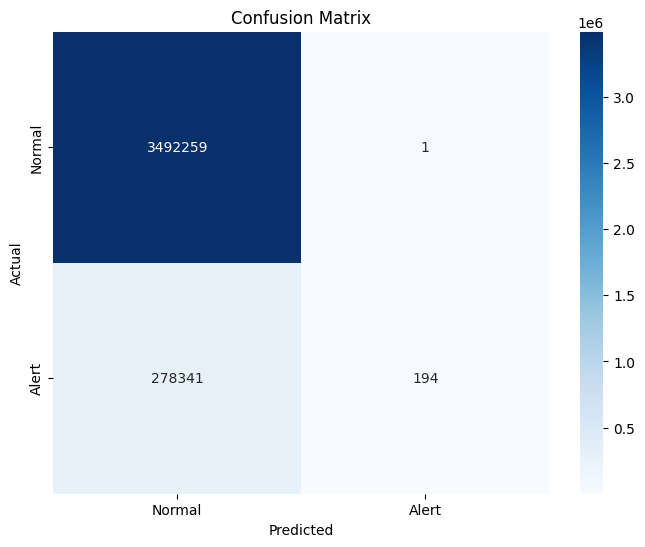


____________________________________________________________________________________________________

Time taken: 4.99 seconds

____________________________________________________________________________________________________


In [31]:
# Start timing
start_time = time.time()

# Make predictions on the test set
y_pred = model_loaded.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Plot confusion matrix with class names
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Alert'], yticklabels=['Normal', 'Alert'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# End timing
end_time = time.time()
duration = end_time - start_time
print("\n" + "_"*100)
print(f"\nTime taken: {duration:.2f} seconds")
print("\n" + "_"*100)


## <font color = lightsteelblue>TBD

## <font color = lightsteelblue>TBD

## <font color = lightsteelblue>TBD